In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [47]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [48]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y.reshape(-1, 1))

/Users/eabg97/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [49]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y.reshape(10,))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [50]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_x.transform(np.array([[6.5]]))))
y_pred

array([170370.0204065])

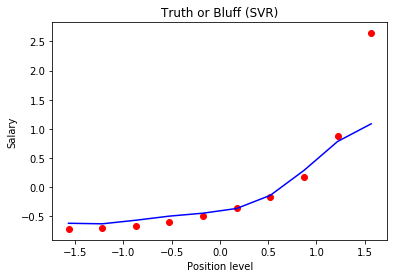

In [51]:
plt.scatter(x, y, color='red')
plt.plot(x, regressor.predict(x), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()